In [32]:
import pandas as pd
import numpy as np
#load the data
data = pd.read_csv('http://archive.ics.uci.edu/ml/machine-learning-databases/'
                   'arrhythmia/arrhythmia.data', header=None, sep=',', engine='python')

display(data.head(3))

,0,1,2,3,4,5,6,7,8,9,...,270,271,272,273,274,275,276,277,278,279
0,75,0,190,80,91,193,371,174,121,-16,...,0.0,9.0,-0.9,0.0,0.0,0.9,2.9,23.3,49.4,8
1,56,1,165,64,81,174,401,149,39,25,...,0.0,8.5,0.0,0.0,0.0,0.2,2.1,20.4,38.8,6
2,54,0,172,95,138,163,386,185,102,96,...,0.0,9.5,-2.4,0.0,0.0,0.3,3.4,12.3,49.0,10


In [33]:
print('%d rows and %d columns' % (data.shape[0],data.shape[1]))

452 rows and 280 columns


In [34]:
np.unique(data[len(data.columns)-1])

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 14, 15, 16])

In [35]:
data['arrhythmia'] = data[len(data.columns)-1].map(lambda x: 0 if x==1 else 1)
data = data.drop(len(data.columns)-2, axis=1)

In [36]:
data.groupby(['arrhythmia']).size()

,0
arrhythmia,
0,245
1,207


In [37]:
data = data._get_numeric_data()
print('%d rows and %d columns' % (data.shape[0],data.shape[1]))

452 rows and 275 columns


In [38]:
data.head(3)

,0,1,2,3,4,5,6,7,8,9,...,270,271,272,273,274,275,276,277,278,arrhythmia
0,75,0,190,80,91,193,371,174,121,-16,...,0.0,9.0,-0.9,0.0,0.0,0.9,2.9,23.3,49.4,1
1,56,1,165,64,81,174,401,149,39,25,...,0.0,8.5,0.0,0.0,0.0,0.2,2.1,20.4,38.8,1
2,54,0,172,95,138,163,386,185,102,96,...,0.0,9.5,-2.4,0.0,0.0,0.3,3.4,12.3,49.0,1


In [39]:
X = data.iloc[:, :-1]  # The first to second-last columns are the features
y = data.iloc[:, -1]   # The last column is the ground-truth label
print(np.unique(y))
print(X.shape)

[0 1]
(452, 274)


In [40]:
from sklearn.model_selection import train_test_split
# splitting the dataset to training and validation datasets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=20181004)

In [41]:
from sklearn.preprocessing import StandardScaler
# Standardizing the training and test datasets
# Note that we are scaling based on the information from the training data
# Then we apply the scaling that is done from training data to the test data
sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)


In [42]:
import numpy as np

class LogisticRegression(object):

    def __init__(self, eta=0.05, n_epoch=100, random_state=1):
        """Feel free to change the hyperparameters"""
        self.eta = eta
        self.n_epoch = n_epoch
        self.random_state = random_state

    def fit(self, X, y):
        rgen = np.random.RandomState(self.random_state)
        self.w_ = rgen.normal(loc=0.0, scale=0.01, size=1 + X.shape[1])
        self.cost_ = []

        for i in range(self.n_epoch):
            net_input = self.net_input(X)
            output = self.activation(net_input)
            gradient_weights, gradient_bias = self.gradient(X, output, y)
            self.w_[1:] += self.eta * gradient_weights
            self.w_[0] += self.eta * gradient_bias
            cost = self.loss(output, y)
            self.cost_.append(cost)
            # Debugging information
            #print(f"Epoch {i+1}, Loss: {cost}, Mean output: {np.mean(output)}")
        return self

    def net_input(self, X):
        """Calculate net input"""
        return np.dot(X, self.w_[1:]) + self.w_[0]

    def loss(self, output, y):
        """Calculate cross entropy loss"""
        # Cross entropy loss for logistic regression
        epsilon = 1e-10  # Small constant to avoid log(0)
        output = np.clip(output, epsilon, 1 - epsilon)  # Clip values to ensure they are not exactly 0 or 1
        return -np.sum(y * np.log(output) + (1 - y) * np.log(1 - output))

    def gradient(self, X, output, y):
        """Calculate the partial derivative of cross entropy loss with respect to weights"""
        errors = y - output
        return errors.dot(X), errors.sum()

    def activation(self, z):
        """Compute logistic sigmoid activation"""
        return 1 / (1 + np.exp(-z))

    def predict(self, X):
        """Return class label after unit step"""
        net_input = self.net_input(X)
        return np.where(self.activation(net_input) >= 0.5, 1, 0)


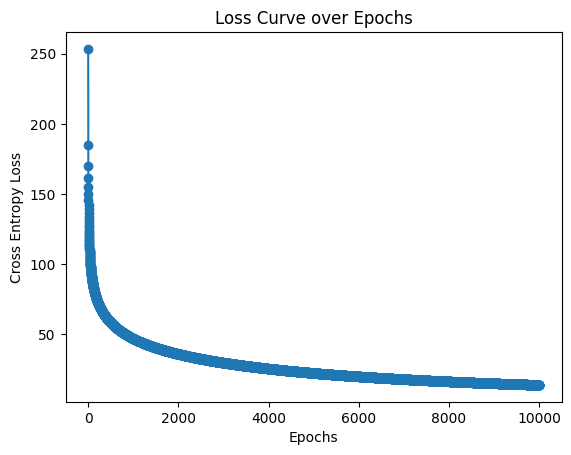

In [43]:
#Plotting the loss curve.
import matplotlib.pyplot as plt

model = LogisticRegression(eta=0.001, n_epoch=10000, random_state=1)
model.fit(X_train_std, y_train)

plt.plot(range(1, len(model.cost_) + 1), model.cost_, marker='o')
plt.xlabel('Epochs')
plt.ylabel('Cross Entropy Loss')
plt.title('Loss Curve over Epochs')
plt.show()

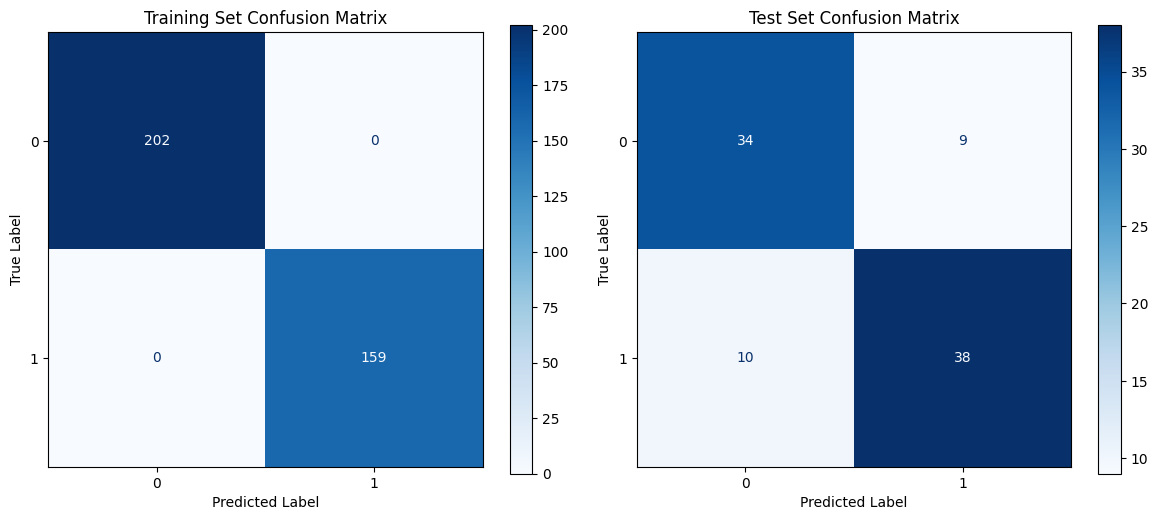

In [44]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, f1_score

# Make predictions on the training set
y_train_pred = model.predict(X_train_std)

# Make predictions on the test set
y_test_pred = model.predict(X_test_std)

# Compute the confusion matrix for the training set
cm_train = confusion_matrix(y_train, y_train_pred)
# Compute the confusion matrix for the test set
cm_test = confusion_matrix(y_test, y_test_pred)

# Plot the confusion matrix for the training set
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)  # Create the first subplot
disp_train = ConfusionMatrixDisplay(confusion_matrix=cm_train, display_labels=[0, 1])
disp_train.plot(cmap=plt.cm.Blues, ax=plt.gca())
plt.title('Training Set Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')

# Plot the confusion matrix for the test set
plt.subplot(1, 2, 2)  # Create the second subplot
disp_test = ConfusionMatrixDisplay(confusion_matrix=cm_test, display_labels=[0, 1])
disp_test.plot(cmap=plt.cm.Blues, ax=plt.gca())
plt.title('Test Set Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')

plt.tight_layout()  # Adjust the layout
plt.show()

In [45]:
# Computing the F1-score of this confusion matrix.
# Calculate F1-score
f1_train = f1_score(y_train, y_train_pred, pos_label=1)  # Label 1 as the positive class
f1_test = f1_score(y_test, y_test_pred, pos_label=1)      # Label 1 as the positive class

# Print F1-score
print(f"F1-score for Training Set: {f1_train:.4f}")
print(f"F1-score for Test Set: {f1_test:.4f}")

F1-score for Training Set: 1.0000
F1-score for Test Set: 0.8000
